# **<h3 align="center"> Capstone Project</h3>**
## **<h3 align="center">Classification Problem</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

## Introduction
Now that we already created the clusters and name the users, we will develop a classification model aim to classify the CritiPersonality of the new user based on some features as:
- age;
- gender;
- prefered and least favorite entertainment;
- like and dislike genres;
- watching and reading frequency.


----------------------
## Imports
In the following cell we will select the needed imports to run this notebook.

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature analysis and selection
from phik import phik_matrix
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler ## we should use the minmaxscale since mostly are binary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

----------------------------
## Loading the DataSet
Since we already generate users data we will call the final dataset in notebook Clustering.

In [2]:
data = pd.read_csv('Data/classification_data.csv')

In [3]:
data.head(3)

,age,gender,movie_watching_freq,show_watching_freq,reading_freq,fav_Books,fav_Movies,fav_Tv-shows,least_fav_Books,least_fav_Movies,...,dislikes_Drama,dislikes_Fantasy,dislikes_History,dislikes_Horror,dislikes_Mystery,dislikes_Romance,dislikes_Sci-Fi,dislikes_Thriller,cluster,CritiPersonality
0,27,0,Weekly,Rarely,Monthly,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,daily diverse explorer
1,32,0,Monthly,Monthly,Daily,1,0,0,0,0,...,0,0,0,1,0,0,1,0,5,cinematic bookworms
2,30,0,Daily,Monthly,Rarely,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,daily diverse explorer


-------------------------
## Preparing the Data to Model


We are going to drop 'cluster' column as it will not be necessary for ou classification problem, since 'CritiPersonality' represent the same information. 

In [4]:
data = data.drop(columns='cluster')

Encode the ordinal variables 'movie_watching_freq', 'show_watching_freq' and 'reading_freq' as done previously in Clustering notebook.

In [5]:
# Define the encoding map
encoding_map = {'Never': 0, 'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Daily': 4}

# Apply the mapping to encode the ordinal variables in data
data['movie_watching_freq'] = data['movie_watching_freq'].map(encoding_map)
data['show_watching_freq'] = data['show_watching_freq'].map(encoding_map)
data['reading_freq'] = data['reading_freq'].map(encoding_map)

In the next cell, we are going to select only the binary features on our dataset to latter plot a correlation matrix that will demonstrate the most correlated feature-pairs.

In [6]:
# Extract the subset of your DataFrame with the selected columns
data_matrix = data.drop(columns=['age', 'movie_watching_freq', 'show_watching_freq',
       'reading_freq', 'CritiPersonality'])

--------------
## Feature Selection

Through Phi Coefficient we will evaluate the correlation between the binary variables of our dataset to identify some highly correlated feature-pairs. To have a clear understanding of this a matrix will be plotted.

interval columns not set, guessing: ['gender', 'fav_Books', 'fav_Movies', 'fav_Tv-shows', 'least_fav_Books', 'least_fav_Movies', 'least_fav_None', 'least_fav_Tv-shows', 'likes_Action', 'likes_Adventure', 'likes_Animation', 'likes_Biography', 'likes_Classics', 'likes_Comedy', 'likes_Documentary', 'likes_Drama', 'likes_Fantasy', 'likes_History', 'likes_Horror', 'likes_Mystery', 'likes_Romance', 'likes_Sci-Fi', 'likes_Thriller', 'likes_War', 'dislikes_Action', 'dislikes_Adventure', 'dislikes_Animation', 'dislikes_Classics', 'dislikes_Comedy', 'dislikes_Documentary', 'dislikes_Drama', 'dislikes_Fantasy', 'dislikes_History', 'dislikes_Horror', 'dislikes_Mystery', 'dislikes_Romance', 'dislikes_Sci-Fi', 'dislikes_Thriller']


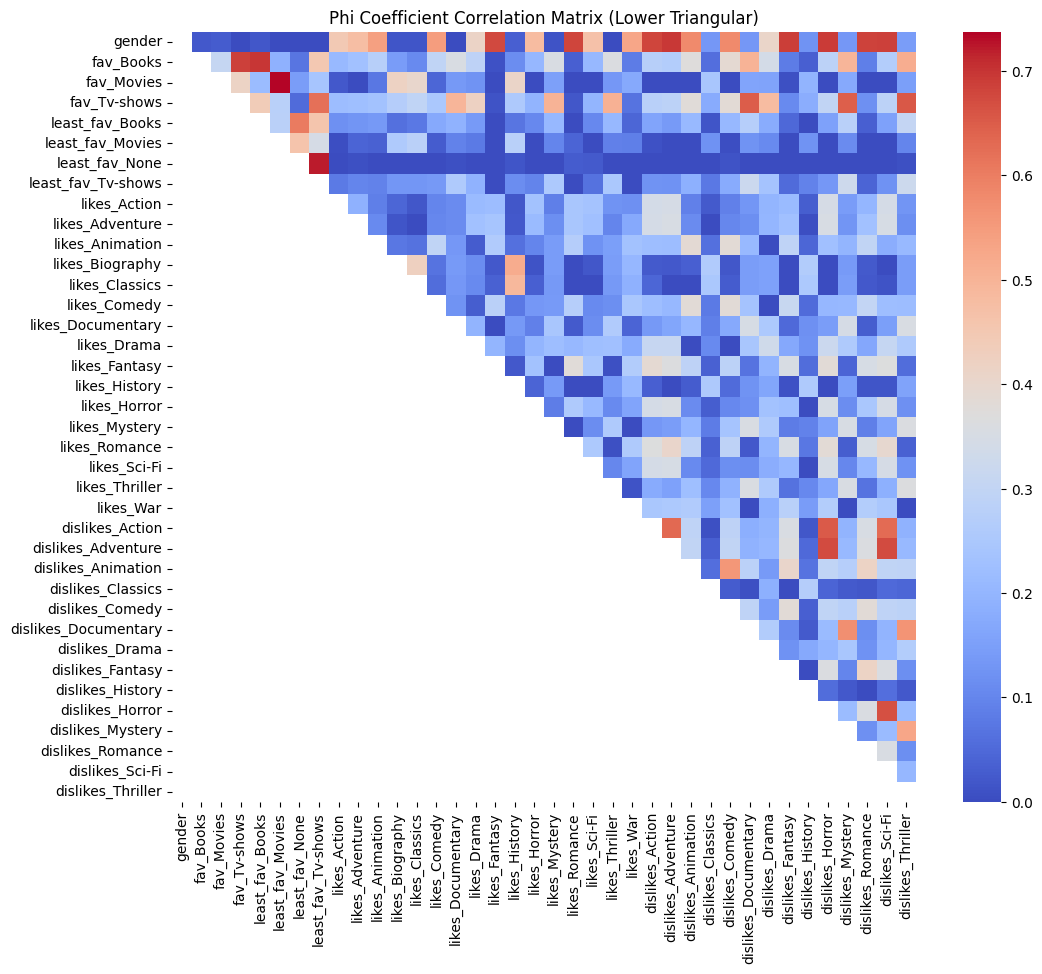

Top 20 correlated pairs:
fav_Movies          least_fav_Movies        0.737268
least_fav_None      least_fav_Tv-shows      0.721625
fav_Books           least_fav_Books         0.698998
gender              dislikes_Adventure      0.696059
                    dislikes_Horror         0.692046
                    dislikes_Fantasy        0.688832
                    dislikes_Sci-Fi         0.687234
fav_Books           fav_Tv-shows            0.686463
gender              dislikes_Romance        0.685126
                    dislikes_Action         0.682370
                    likes_Romance           0.680047
                    likes_Fantasy           0.676671
dislikes_Adventure  dislikes_Horror         0.671828
                    dislikes_Sci-Fi         0.671604
dislikes_Horror     dislikes_Sci-Fi         0.667055
fav_Tv-shows        dislikes_Thriller       0.655805
dislikes_Action     dislikes_Horror         0.652602
fav_Tv-shows        dislikes_Documentary    0.648441
                    d

In [7]:
# Calculate the Phi Coefficient matrix
phi_matrix = phik_matrix(data_matrix)

# Mask the upper triangular part
mask = np.tril(np.ones_like(phi_matrix, dtype=bool))

# Create a heatmap of the lower triangular part
plt.figure(figsize=(12, 10))
sns.heatmap(phi_matrix, mask=mask, cmap='coolwarm')
plt.title('Phi Coefficient Correlation Matrix (Lower Triangular)')
plt.show()

# Apply the mask to the correlation matrix
masked_phi_matrix = phi_matrix.mask(mask)

# Stack the correlation matrix and sort the values
stacked_corr = masked_phi_matrix.stack().sort_values(ascending=False)

# Get the top N highest correlated pairs and their correlation coefficient values
top_N = 20  # Change this value to get a different number of pairs
top_correlated = stacked_corr.head(top_N)

print("Top", top_N, "correlated pairs:")
print(top_correlated)

We identify a highly correlated feature-pair the ones with a correlation value above 0.7. Considering that, we will exclude the 'least_fav_Movies' and 'least_fav_Tv-shows' variables from the dataset.

In [8]:
data = data.drop(columns=['least_fav_Movies', 'least_fav_Tv-shows'])

In the next cells train test splitting is done and scaling.

In [9]:
y = data['CritiPersonality']
X = data.drop(columns='CritiPersonality')

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

Since we will perform a Chi square as MIC test to keep the most infuential features, we will drop the 'age' variable since it is not a categorical variable, and these teste are only adequate for those type of features.

In [11]:
X_train_without_age = X_train.drop(columns=['age'])
X_val_without_age = X_val.drop(columns=['age'])

In [12]:
# Scaling all features excluding 'age'
feat_scaler = MinMaxScaler()
X_train_scaled = feat_scaler.fit_transform(X_train_without_age)
X_val_scaled = feat_scaler.transform(X_val_without_age)

Below the Chi Square and MIC tests are being performed on the categorical dfeatures of our dataset, we are choosing 15 features to select. The common features selected by both tests will be the ones we will use in our predictive model.

In [13]:
# Perform chi-square test on the scaled dataset
threshold = 15  # Choose the threshold value for the number of top features to select
selector_chi2 = SelectKBest(chi2, k=threshold)
selector_chi2.fit(X_train_scaled, y_train)

# Get the indices of the top features selected by Chi-Square
top_feature_indices_chi2 = selector_chi2.get_support()

# Get the names of the top features selected by Chi-Square from the original X_train columns
names_Chi2 = X_train_without_age.columns[top_feature_indices_chi2]

# Perform MIC test on the scaled dataset
feature_scores_MIC = mutual_info_classif(X_train_scaled, y_train, random_state=0)

# Get the indices of the top features selected by MIC
top_feature_indices_MIC = np.argsort(feature_scores_MIC)[::-1][:threshold]

# Get the names of the top features selected by MIC from the original X_train columns
names_MIC = X_train_without_age.columns[top_feature_indices_MIC]

# Find the intersection of features selected by both tests and exclude 'age'
features_selected = list(set(names_Chi2).intersection(set(names_MIC)))

In [14]:
features_selected

['dislikes_Comedy',
 'fav_Tv-shows',
 'dislikes_Thriller',
 'dislikes_Animation',
 'fav_Books',
 'dislikes_Drama',
 'likes_Biography',
 'likes_Documentary',
 'likes_Mystery',
 'dislikes_Mystery',
 'likes_Thriller',
 'dislikes_Documentary']

In [15]:
# Adding 'age' variable
X_train_selected_ft = X_train[features_selected + ['age']]
X_val_selected_ft = X_val[features_selected + ['age']] 

In [16]:
X_train_selected_ft = feat_scaler.fit_transform(X_train_selected_ft)
X_val_selected_ft = feat_scaler.transform(X_val_selected_ft)

-----------------------------------------------------------
## Modelling

We will apply a simple Logistic Regression model.

In [17]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on training data with selected features
log_reg.fit(X_train_selected_ft, y_train)

# Make predictions on data
predictions_train = log_reg.predict(X_train_selected_ft)
predictions_val = log_reg.predict(X_val_selected_ft)


# Evaluate the model
accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_val = accuracy_score(y_val, predictions_val)
report = classification_report(y_val, predictions_val)

print("Training Accuracy:", accuracy_train)
print("Validation Accuracy:", accuracy_val)
print("Classification Report:\n", report)

c:\Users\Ultilizador\Documents\GitHub\Capstone-Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9285333333333333
Validation Accuracy: 0.914
Classification Report:
                                   precision    recall  f1-score   support

             cinematic bookworms       0.93      0.67      0.78       461
           cultural connoisseurs       0.91      0.91      0.91        95
          daily diverse explorer       0.87      0.99      0.93       993
             literary historians       0.82      0.81      0.81       139
screen entertainment enthusiasts       0.98      0.97      0.98       812

                        accuracy                           0.91      2500
                       macro avg       0.91      0.87      0.88      2500
                    weighted avg       0.92      0.91      0.91      2500



Since we had pretty good results as we can see from above, we decided that this will be the model to be used in the chat bot.

------------------------------------------------------

## Saving the model

In [18]:
import pickle
path = "./classification_model.pkl"

with open(path, 'wb') as file:
    pickle.dump(log_reg, file)